# Machine Learning Analysis for Performance Prediction in 'La Más Draga'

<a id="table_of_contents"></a>

### Table of contents

<ol>
  <li><a href="#overview">Situation Overview</a>
  <ul>
   <li><a href='#dataset'>Examine the overall dataset
    </a></li>
    <li><a href='#cleaning'>Execute cleaning procedures
    </a></li>
    
  </ul>
  </li>
  
  <li><a href="#eda">Exploratory analysis</a>
  <ul>
    <li><a href='#unique_values'>Begin by computing distinct values
    </a></li>
    <li><a href='#statistics'>Find out the statistics
    </a></li>
    </ul>
  </li>  
  
  <li><a href="#analysis">Data analysis</a>
  <ul>
    <li><a href='#free_paid_apps'>Comparing ratings, reviews and installs between free and paid apps
    </a></li>
    </ul>
  </li>  
  <li><a href="#insights">Insights</a>
</ol>

<a id="overview"></a>
## Situation Overview
Utilizing machine learning to predict my favorite contestant performance during "La Más Draga", which is competition similar to Ru Paul's Drag Race.

1. From our data, what are the significant factors contributing to competition results?
2. Who are the competing participants in the same category as my favorite participant??
3. Does my favorite participant have a good chance of winning the competition?

<a href="#table_of_contents">Navigate to contents</a>

<a id="dataset"></a>
Examine the overall dataset
<br>
<a href="#table_of_contents">Navigate to contents</a>

In [1]:
#import python libraries
import pandas as pd
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#connect to mysql database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="NilArj_21",
    database="project",
)

In [3]:
# participants table
df_table_1 = pd.read_sql("SELECT * FROM la_mas_draga;", conn)

print(df_table_1.head())

  Lugar    Participante                       Nombre    Lugar de residencia  \
0     1      Alexis 3XL                 Itzel Moreno  Matamoros, Tamaulipas   
1     2  Sophia Jiménez            Guillermo Jiménez      Guadalajara, Jal.   
2     3        Gvajardo               Pablo Guajardo         Monterrey, NL.   
3     4        Job Star  José Job Carrisalez Sánchez        Saltillo, Coah.   
4     5      Soro Nasty                    Luis Soro        Monterrey, N.L.   

   Edad       Selección  Retos ganados     Resultado  Temporada  
0    28  Audiciones MTY              2      Ganadora          2  
1    31  Audiciones GDL              3    Finalistas          2  
2    29     Secretísima              1    Finalistas          2  
3    34  Audiciones MTY              0  6ª eliminada          2  
4    33    Pase directo              0  5ª eliminada          2  


C:\Users\nilvi\AppData\Local\Temp\ipykernel_10160\344945470.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_table_1 = pd.read_sql("SELECT * FROM la_mas_draga;", conn)


In [4]:
df_table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Lugar                49 non-null     object
 1   Participante         49 non-null     object
 2   Nombre               49 non-null     object
 3   Lugar de residencia  49 non-null     object
 4   Edad                 49 non-null     int64 
 5   Selección            49 non-null     object
 6   Retos ganados        49 non-null     int64 
 7   Resultado            49 non-null     object
 8   Temporada            49 non-null     int64 
dtypes: int64(3), object(6)
memory usage: 3.6+ KB


In [5]:
# progress table
df_table_2 = pd.read_sql("SELECT * FROM la_mas_draga_progress;", conn)

print(df_table_2.head())

       Concursante  Episodio Nombre_de_episodio Progreso
0  Aisha Dollkills         1          Artesanal    MENOS
1  Aisha Dollkills         2            Juguete     SALV
2  Aisha Dollkills         3            A Color     ELIM
3  Aisha Dollkills         4          Recursiva     None
4  Aisha Dollkills         5             Famosa     None


C:\Users\nilvi\AppData\Local\Temp\ipykernel_10160\2850977069.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_table_2 = pd.read_sql("SELECT * FROM la_mas_draga_progress;", conn)


In [6]:
df_table_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Concursante         548 non-null    object
 1   Episodio            548 non-null    int64 
 2   Nombre_de_episodio  548 non-null    object
 3   Progreso            444 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.2+ KB


<a id="cleaning"></a>
Execute cleaning procedures
<br>
<a href="#table_of_contents">Navigate to contents</a>

In [7]:
df_table_2 = df_table_2.rename(columns = {"Concursante" : "Participante"})

In [8]:
df_table_2.head()

,Participante,Episodio,Nombre_de_episodio,Progreso
0,Aisha Dollkills,1,Artesanal,MENOS
1,Aisha Dollkills,2,Juguete,SALV
2,Aisha Dollkills,3,A Color,ELIM
3,Aisha Dollkills,4,Recursiva,None
4,Aisha Dollkills,5,Famosa,None


In [9]:
df_table_1["Lugar"] = df_table_1["Lugar"].astype(int)

In [10]:
df_table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Lugar                49 non-null     int32 
 1   Participante         49 non-null     object
 2   Nombre               49 non-null     object
 3   Lugar de residencia  49 non-null     object
 4   Edad                 49 non-null     int64 
 5   Selección            49 non-null     object
 6   Retos ganados        49 non-null     int64 
 7   Resultado            49 non-null     object
 8   Temporada            49 non-null     int64 
dtypes: int32(1), int64(3), object(5)
memory usage: 3.4+ KB


## Exploratory analysis

<a id="unique_values"></a>
Begin by computing distinct values
<br>
<a href="#table_of_contents">Navigate to contents</a>

Text(0, 0.5, 'Number of participants')

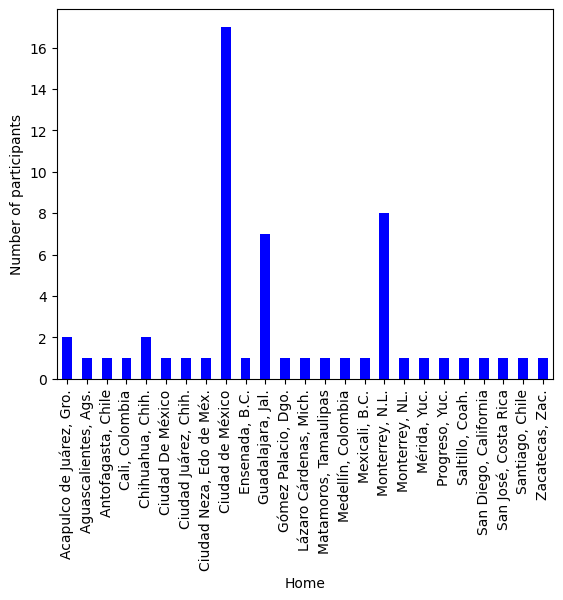

In [81]:
participants_home = df_contestants.groupby('Lugar de residencia').size()

participants_home.plot(kind="bar", color="blue")
plt.xlabel("Home")
plt.ylabel("Number of participants")

In [74]:
print(df_contestants["Selección"].unique())

['Audiciones' 'Audiciones MTY' 'Audiciones GDL' 'Secretísima'
 'Pase directo' 'Secretisima' 'Audiciones MÉR' 'Secretisimo'
 'Audiciones CDMX' 'Audiciones CD.JRZ' 'Secreta de secretas'
 'La más Votada' 'Secreta de las secretas' 'Ganadora de Audiciones'
 'Secretísimo' 'La Más Votada' 'Secretísimas']


<a id="statistics"></a>
Find out the statistics
<br>
<a href="#table_of_contents">Navigate to contents</a>

In [51]:
print(df_contestants["Edad"].describe())

count    56.000000
mean     30.125000
std       5.298585
min      20.000000
25%      26.000000
50%      30.000000
75%      33.000000
max      47.000000
Name: Edad, dtype: float64


In [52]:
print(df_contestants["Retos ganados"].describe())

count    56.000000
mean      0.803571
std       0.902917
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       3.000000
Name: Retos ganados, dtype: float64
